# How to train a small data set

Training a model of image classification with very little data is a common practice.

### Strategy:

* Train a small model from scratch
* Overfitting -> regularization, Dropiut
* Overfitting -> Data Augmentation
* Pre-trained models were used for feature extraction
* Fine-tune the pre-trained model


In [22]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Platform: Windows-10-10.0.16299-SP0
Tensorflow version: 1.4.0
Keras version: 2.1.2


# Data set description

Kaggle

data set: Dogs vs. Cats [download](https://www.kaggle.com/c/dogs-vs-cats/data)

![dataset](https://imgur.com/0Il4OZF.png)

The original dataset contains images of 25,000 dogs and cats (12,500 per category) and a size of 543MB (compressed). 

After downloading and extracting, we will create a new data set containing three subsets: a set of **Training sets** containing **1000** samples per class, a **Validation set** of **500** samples per set, and the last one containing **500** for each class **Test set** of a sample.

In [23]:
import os

ROOT_DIR = os.getcwd()
original_dataset_dir = "D:/Program/dataset/Dogs_vs_Cats"
ori_train = os.path.join(original_dataset_dir,"train")

In [24]:
import shutil

def create_directory(datapath, subname):
    child_datapath = os.path.join(datapath, subname)
    if not os.path.exists(child_datapath): 
        os.mkdir(child_datapath)
        
    return child_datapath


# Create a directory to store the data set
base_dir = create_directory(original_dataset_dir, "cats_and_dogs_small")

# Training materials directory
train_dir = create_directory(base_dir, 'train')

# Validation data directory
validation_dir = create_directory(base_dir, 'validation')

# Test data directory
test_dir = create_directory(base_dir, 'test')


# Cat's picture of the training information directory
train_cats_dir = create_directory(train_dir, 'cats')

# Dog pictures of training materials directory
train_dogs_dir = create_directory(train_dir, 'dogs')

# Cat's picture of the authentication data directory
validation_cats_dir = create_directory(validation_dir, 'cats')

# Dog's picture verification information directory
validation_dogs_dir = create_directory(validation_dir, 'dogs')

# Cat's picture of the test data directory
test_cats_dir = create_directory(test_dir, 'cats')

# Dog's picture of the test data directory
test_dogs_dir = create_directory(test_dir, 'dogs')

In [25]:
def copy_ori_pic_to_small_file(fnames, dst_path, ori_train=ori_train):
    for fname in fnames:
        src = os.path.join(ori_train, fname)
        dst = os.path.join(dst_path, fname)
        if not os.path.exists(dst):
            shutil.copyfile(src, dst)
            
# Copy the first 1000 pictures of cats to train_cats_dir    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
copy_ori_pic_to_small_file(fnames, train_cats_dir)
print('Copy first 1000 cat images to train_cats_dir complete!')

# Copy the next 500 pictures of cats to validation_cats_dir 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
copy_ori_pic_to_small_file(fnames, validation_cats_dir)
print('Copy next 500 cat images to validation_cats_dir complete!')

# Copy the next 500 pictures of cats to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
copy_ori_pic_to_small_file(fnames, test_cats_dir)
print('Copy next 500 cat images to test_cats_dir complete!')


# Copy the first 1000 pictures of dogs to train_dogs_dir    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
copy_ori_pic_to_small_file(fnames, train_dogs_dir)
print('Copy first 1000 cat images to train_dogs_dir complete!')

# Copy the next 500 pictures of dogs to validation_dogs_dir 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
copy_ori_pic_to_small_file(fnames, validation_dogs_dir)
print('Copy next 500 cat images to validation_dogs_dir complete!')

# Copy the next 500 pictures of dogs to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
copy_ori_pic_to_small_file(fnames, test_dogs_dir)
print('Copy next 500 cat images to test_dogs_dir complete!')

Copy first 1000 cat images to train_cats_dir complete!
Copy next 500 cat images to validation_cats_dir complete!
Copy next 500 cat images to test_cats_dir complete!
Copy first 1000 cat images to train_dogs_dir complete!
Copy next 500 cat images to validation_dogs_dir complete!
Copy next 500 cat images to test_dogs_dir complete!


In [26]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Data Preprocessing
### Strategy:

* Read into the image file.
* Decodes the JPEG content into pixels for the RGB grid.
* Convert it to a floating-point tensor.
* Rescale pixel values (between 0 and 255) to [0,1] intervals (as you know, neural networks prefer to handle small input values).

reference: 
[ImageDataGenerator](https://keras-cn.readthedocs.io/en/latest/preprocessing/image/)

In [27]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be normalized : Rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Directly from the file directory to read the image file information
train_generator = train_datagen.flow_from_directory( 
        # This is the directory of image data
        train_dir,
        # All image sizes will be resized to 150x150
        target_size=(150, 150),
        # Each time a batch of 20 images is generated
        batch_size=20,
        # Since this is a binary classification problem, the lable value of y is also converted to a binary label
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<br><br>
It produces batch tensions of 150 × 150 RGB images (shape "(20,150,150,3)") and binary labels (shape "(20,)"). 

20 is the number of samples in each batch (batch size). 

Note that the generator can generate these lots without any restrictions: because it simply iterates over the images that exist in the destination folder. Therefore, we need to "break" the iteration loop at some point.

In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Model

* Input:150x150
* Conv2D:reLU
* MaxPooling2D
* 7x7 before the Flatten layer 
* flatten
* 512,relu
* 1,sigmoid
<br><br>

The depth of the feature map gradually increases over the network (from 32 to 128), while the size of the feature map is decreasing (from 148x148 to 7x7). 

This is a pattern you will see in almost all convnets constructs.
<br><br>
Since we are dealing with binary classification problems, we ended the network with a neuron (a Dense of size 1) and a sigmoid activation function. 

This neuron will be used to see the probability that the image belongs to that class or another class.

In [31]:
from keras import layers
from keras import models
from keras.utils import plot_model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3),padding='same'kernel_regularizer=l2(0.00001),
                activity_regularizer=l1(0.0001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 18, 18, 128)       147584    
__________

In [32]:
from keras import optimizers

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# Training
##  About fit_generator in Chinese

讓我們將模型與使用圖像張量產生器的數據進行訓練。我們使用fit_generator方法。

因為數據是可以無休止地持續生成，所以圖像張量產生器需要知道在一個訓練循環(epoch)要從圖像張量產生器中抽取多少個資料。這是steps_per_epoch參數的作用：在從生成器中跑過steps_per_epoch批次之後，即在運行steps_per_epoch梯度下降步驟之後，訓練過程將轉到下一個循環(epoch)。在我們的情況下，批次是20個樣本，所以它需要100次，直到我們的模型讀進了2000個目標樣本。

當使用fit_generator時，可以傳遞一個validation_data參數，就像fit方法一樣。重要的是，這個參數被允許作為數據生成器本身，但它也可以是一個Numpy數組的元組。如果您將生成器傳遞為validation_data，那麼這個生成器有望不斷生成一批驗證數據，因此您還應該指定validation_steps參數，該參數告訴進程從驗證生成器中抽取多少批次以進行評估。


In [33]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch=100,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 151ms/step - loss: 0.6983 - acc: 0.5160 - val_loss: 0.6882 - val_acc: 0.5860
Epoch 2/30
100/100 [==============================] - 10s 96ms/step - loss: 0.6893 - acc: 0.5260 - val_loss: 0.6921 - val_acc: 0.5450
Epoch 3/30
100/100 [==============================] - 10s 96ms/step - loss: 0.6863 - acc: 0.5585 - val_loss: 0.6717 - val_acc: 0.5830
Epoch 4/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6700 - acc: 0.5890 - val_loss: 0.6520 - val_acc: 0.6010
Epoch 5/30
100/100 [==============================] - 10s 95ms/step - loss: 0.6403 - acc: 0.6340 - val_loss: 0.6734 - val_acc: 0.5700
Epoch 6/30
100/100 [==============================] - 9s 95ms/step - loss: 0.6087 - acc: 0.6710 - val_loss: 0.6196 - val_acc: 0.6600
Epoch 7/30
100/100 [==============================] - 10s 96ms/step - loss: 0.5714 - acc: 0.6980 - val_loss: 0.6604 - val_acc: 0.6400
Epoch 8/30
100/100 [==============================] - 9s 95ms/

In [36]:
model.save('D:/Program/dataset/Dogs_vs_Cats/model/cats_and_dogs_small_1.h5')

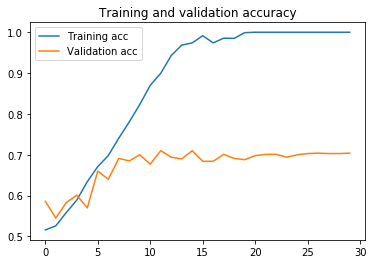

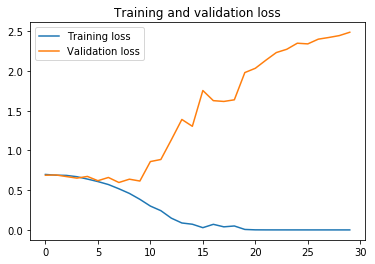

In [39]:
import matplotlib.pyplot as plt

def show_train_history(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
show_train_history(history)

# Overfitting
Reduce overfitting strategy:

**Regularization and Dropout**

Another:

Computer-aided technique that is almost universally used when processing images using deep learning models: 

**Aata Augmentation**
<br><br>
example about ImageDataGenerator:

In [40]:
datagen = ImageDataGenerator(
          rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')

* rotation_range是以度（0-180）為單位的值，它是隨機旋轉圖片的範圍。
* width_shift和height_shift是範圍（佔總寬度或高度的一小部分），用於縱向或橫向隨機移動圖片。
* shear_range用於隨機剪切變換。
* zoom_range用於隨機放大圖片內容。
* horizontal_flip用於在沒有水平不對稱假設（例如真實世界圖片）的情況下水平地隨機翻轉一半圖像。
* fill_mode是用於填充新創建的像素的策略，可以在旋轉或寬/高移位後顯示。

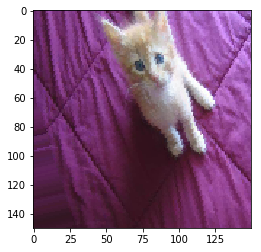

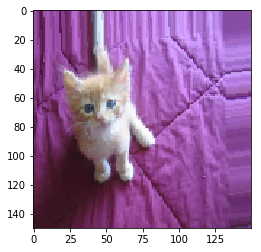

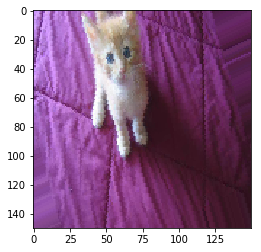

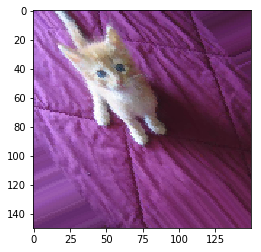

In [83]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Obtain the cat file list of training set
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Take an image
img_path = fnames[20]

# load and resize
img = image.load_img(img_path, target_size=(150, 150))

# Convert to Numpy array and shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape (1, 150, 150, 3) to enter the model
x = x.reshape((1,) + x.shape)

# Through the flow () method will randomly generate a new image
# It loops indefinitely, so we need to "break" the loop at some point
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

If we use this data enhancement configuration to train a new network, our network will **never see the same repeated input**.

However, the input it sees is still interlinked because they come from a small amount of raw images - we can not generate new information, and we can only remix existing information. 

Therefore, this may not be enough to completely get rid of overfitting. To further combat overfitting, we will also add a Dropout layer before the densely-connected classifier:

In [84]:
from keras.regularizers import l1,l2
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3),padding='same',))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
# model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# kernel_regularizer=l2(0.000001),activity_regularizer=l1(0.000001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 18, 18, 128)       147584    
__________

<br><br>

Use adam in optimizer may cause the accuracy not increase.

So use RMSprop

In [77]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [78]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [79]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/40
100/100 [==============================] - 27s 270ms/step - loss: 0.6879 - acc: 0.5394 - val_loss: 0.6584 - val_acc: 0.5945
Epoch 2/40
100/100 [==============================] - 24s 243ms/step - loss: 0.6600 - acc: 0.6025 - val_loss: 0.6165 - val_acc: 0.6650
Epoch 3/40
100/100 [==============================] - 24s 243ms/step - loss: 0.6393 - acc: 0.6297 - val_loss: 0.5894 - val_acc: 0.6745
Epoch 4/40
100/100 [==============================] - 26s 258ms/step - loss: 0.6111 - acc: 0.6622 - val_loss: 0.5678 - val_acc: 0.6910
Epoch 5/40
100/100 [==============================] - 24s 240ms/step - loss: 0.5943 - acc: 0.6744 - val_loss: 0.5746 - val_acc: 0.6948
Epoch 6/40
100/100 [==============================] - 25s 253ms/step - loss: 0.5874 - acc: 0.6891 - val_loss: 0.5535 - val_acc: 0.7164
Epoch 7/40
100/100 [==============================] - 24s 237ms/step - loss: 0.5774 - acc: 0.6956 - val_loss: 0.6289 - val_acc: 0.6104
Epoch 8/40
100/100 [==============================] - 2

In [80]:
model.save('D:/Program/dataset/Dogs_vs_Cats/model/cats_and_dogs_small_1.h5')

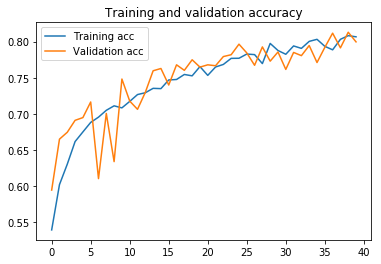

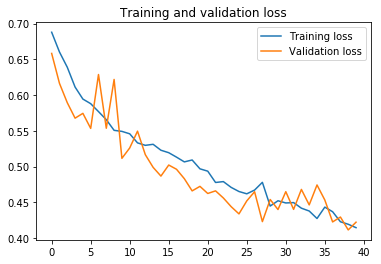

In [81]:
show_train_history(history)

We no longer have overfitting issues due to the use of **data augmentation **

The training curve follows the verification curve quite closely. We can now achieve 81% accuracy.

We can achieve better accuracy by further utilizing **normalization** techniques and **tuning network parameters** such as the number of filters per convolutional layer or the number of layers of the network

In order to continue to improve the accuracy of our model for this problem, I will use the pre-trained model for the next step.
<br><br>
* Good use of data to expand the training of image data recognition can improve performance
* The use of Regularization and Dropout can suppress overfitting problems
<br><br>

Reference:
* [ImageDataGenerator](https://keras-cn.readthedocs.io/en/latest/preprocessing/image/)
* [fchollet: deep-learning-with-python-notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks)